In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD

In [2]:
import sys, os,  glob 
import numpy as np
# import panda as pd
import matplotlib.pyplot as plt


In [3]:
sys.path.append('../')

In [4]:
import utils

Using TensorFlow backend.


In [5]:
omm_path = glob.glob('../omm_run_*')

In [6]:
pdb_file = '../pdb/fs-peptide.pdb' 
ref_traj = mda.Universe(pdb_file) 
RMSD_all = dict()
for omm in sorted(omm_path): 
    traj_file = os.path.join(omm, 'output.dcd') 
    mda_traj = mda.Universe(pdb_file, traj_file) 
    R = RMSD(mda_traj, ref_traj, select='protein and name CA')
    R.run(verbose=1)
    RMSD_all[omm] = R.rmsd[:,2].T
    print 'finished', omm[4:]

finished mm_run_1545172292
finished mm_run_1545172294
finished mm_run_1545172296
finished mm_run_1545172298
finished mm_run_1545172300
finished mm_run_1545172302
finished mm_run_1545172304
finished mm_run_1545172306
finished mm_run_1545172308
finished mm_run_1545172310
finished mm_run_1545172312
finished mm_run_1545172314
finished mm_run_1545172316
finished mm_run_1545172318
finished mm_run_1545172320
finished mm_run_1545172322


In [7]:
sum(len(RMSD_all[result]) for result in RMSD_all)

318309

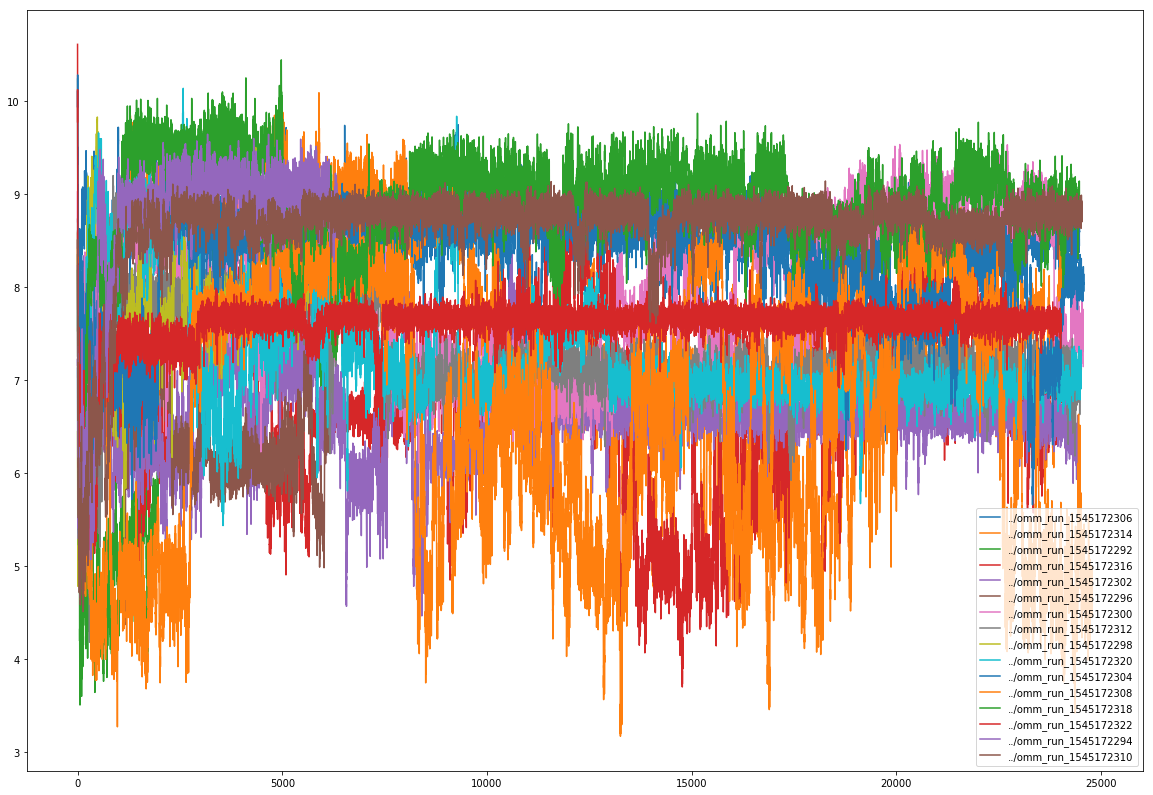

In [8]:
plt.figure(figsize=(20,14))
for result in RMSD_all: 
    starting_pdb = os.path.join(result, '100-fs-peptide-400K.pdb') 
    if os.path.isfile(starting_pdb): 
#         pass
        plt.plot(RMSD_all[result], label=result) 
    else: 
        record_pdb = glob.glob(result + '/*pdb') 
        plt.plot(np.arange(len(RMSD_all[result])) + float(record_pdb[0][-10:-4]), RMSD_all[result], label=result)               
#         print record_pdb
#         print np.arange(len(RMSD_all[result])) + float(record_pdb[0][-10:-4])

plt.legend(loc='best')

In [83]:
for result in RMSD_all: 
    if np.min(RMSD_all[result]) < 4:  
        traj_file = os.path.join(result, 'output.dcd') 
        num_frame = np.argmin(RMSD_all[result])
        outlier_pdb_file = os.path.join('./', '{}_{:06d}.pdb'.format(traj_file[3:-11], num_frame)) 
        outlier_pdb = utils.write_pdb_frame(traj_file, pdb_file, num_frame, outlier_pdb_file) 
        print result, np.argmin(RMSD_all[result]) , outlier_pdb, np.min(RMSD_all[result])

../omm_run_1544721520 2666 ./omm_run_1544721520_002666.pdb 3.819377091210693
../omm_run_1544761974 2328 ./omm_run_1544761974_002328.pdb 3.8409532941831976
../omm_run_1544721522 142 ./omm_run_1544721522_000142.pdb 3.9750393983410697
../omm_run_1544734774 9010 ./omm_run_1544734774_009010.pdb 3.063138472833641
../omm_run_1544735664 25001 ./omm_run_1544735664_025001.pdb 2.8868494545304983
../omm_run_1544761984 118 ./omm_run_1544761984_000118.pdb 3.4991030038108497
../omm_run_1544761982 13980 ./omm_run_1544761982_013980.pdb 3.859771770405208
../omm_run_1544765273 34 ./omm_run_1544765273_000034.pdb 3.9541502494710543
../omm_run_1544734768 1507 ./omm_run_1544734768_001507.pdb 3.6755761820813526
../omm_run_1544734766 6220 ./omm_run_1544734766_006220.pdb 3.443847911134052
../omm_run_1544735670 4731 ./omm_run_1544735670_004731.pdb 3.320403048240336


In [88]:
pdb_file = '../pdb/fs-peptide.pdb' 
ref_traj = mda.Universe(pdb_file) 
RMSD_outliers = []
# for omm in sorted(omm_path): 
traj_file = glob.glob('../outlier_pdbs/omm_run_15447*pdb') 
mda_traj = mda.Universe(pdb_file, traj_file) 
R = RMSD(mda_traj, ref_traj, select='protein and name CA')
R.run(verbose=1)
RMSD_outliers = R.rmsd[:,2].T

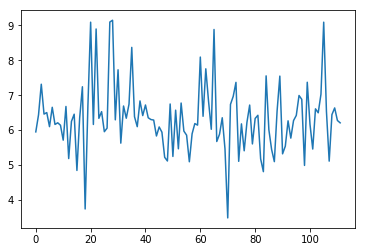

In [89]:
plt.plot(RMSD_outliers)